In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/processed/final_dataset.csv')

In [4]:
data.shape

(25456, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25456 entries, 0 to 25455
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         25456 non-null  object 
 1   Total Cases                     25456 non-null  int64  
 2   New Cases                       25456 non-null  float64
 3   Total Deaths                    25456 non-null  float64
 4   New Deaths                      25456 non-null  float64
 5   Total Recovered                 25456 non-null  float64
 6   New Recovered                   25456 non-null  float64
 7   Active Cases                    25456 non-null  float64
 8   Serious, Critical               25456 non-null  float64
 9   Tot Cases/1M pop                25456 non-null  float64
 10  Deaths/1M pop                   25456 non-null  float64
 11  Total Tests                     25456 non-null  float64
 12  Tests/1M pop                    

In [6]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
1,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
2,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
3,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
4,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58


In [7]:
# Convert date column to date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [8]:
# Selecting specific columns from the current DataFrame
Q1 = data.loc[:, ['Region', 'Country','Population','Total Cases','New Cases','Active Cases', 'Tot Cases/1M pop', 'Deaths/1M pop','Total Tests', 'Tests/1M pop', 'total_vaccinations', 'Year','date']]

# Displaying the first few rows of Q1
print(Q1)

                           Region Country  Population  Total Cases  New Cases   
0           Europe & Central Asia  France  65584518.0     40138560      611.5  \
1           Europe & Central Asia  France  65584518.0     40138560      611.5   
2           Europe & Central Asia  France  65584518.0     40138560      611.5   
3           Europe & Central Asia  France  65584518.0     40138560      611.5   
4           Europe & Central Asia  France  65584518.0     40138560      611.5   
...                           ...     ...         ...          ...        ...   
25451  Middle East & North Africa   Malta    444033.0       121392      611.5   
25452  Middle East & North Africa   Malta    444033.0       121392      611.5   
25453  Middle East & North Africa   Malta    444033.0       121392      611.5   
25454  Middle East & North Africa   Malta    444033.0       121392      611.5   
25455  Middle East & North Africa   Malta    444033.0       121392      611.5   

       Active Cases  Tot Ca

In [9]:
#Group data by country
group_data = Q1.groupby('Country').agg({
    'Population': 'max',               # Max population per country
    'Total Cases': 'sum',              # Sum of total cases per country
    'New Cases': 'sum',                # Sum of new cases per country
    'Active Cases': 'max',             # Max active cases per country
    'Tot Cases/1M pop': 'mean',        # Mean total cases per 1M population per country
    'Deaths/1M pop': 'mean',           # Mean deaths per 1M population per country
    'Total Tests': 'sum',              # Sum of total tests per country
    'Tests/1M pop': 'mean',            # Mean tests per 1M population per country
    'total_vaccinations': 'max',       # Max total vaccinations per country
    'Year': 'max',                     # Max year per country
    'date': 'max'                      # Max date per country
}).reset_index()

In [10]:
group_data

,Country,Population,Total Cases,New Cases,Active Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,total_vaccinations,Year,date
0,Argentina,46010234.0,26538816447,1607633.5,0.000000,219400.0,2841.0,9.389755e+10,776264.0,28322602,2019,2022-03-29
1,Austria,9066710.0,1946011840,195680.0,3811.000000,670727.0,2486.0,6.760753e+10,23302116.0,14584985,2019,2022-03-25
2,Belgium,11668278.0,1554716160,195680.0,3866.000000,416384.0,2946.0,1.198534e+10,3209915.0,17451842,2019,2022-03-25
3,Bulgaria,6844597.0,314740435,4935.0,7997.000000,195676.0,5660.0,2.731510e+09,1698193.0,2852218,2019,2022-03-18
4,Chile,19250195.0,7996960379,912969.5,39356.000000,278247.0,3350.0,7.522047e+10,2617225.0,25596927,2019,2022-03-22
5,Croatia,4059286.0,327432000,152875.0,32609.000000,322650.0,4604.0,1.415021e+09,1394355.0,3921503,2019,2022-03-25
6,Cyprus,1223387.0,156655300,140645.0,0.000000,556741.0,1116.0,2.217227e+09,7879860.0,1188656,2019,2022-03-18
7,Denmark,5834950.0,808674024,155321.0,0.000000,545636.0,1511.0,3.285061e+10,22165247.0,10259219,2019,2022-03-25
8,Ecuador,18113361.0,1367700264,781497.0,0.000000,59083.0,1990.0,3.939311e+09,170173.0,15812935,2019,2022-01-28
9,Estonia,1321910.0,148775091,144925.5,264824.507853,474876.0,2270.0,1.644677e+09,5249652.0,1488804,2019,2022-03-18


In [11]:
# Calculate percentage columns
group_data['Total Cases %'] = group_data['Total Cases'] / group_data['Population'] * 100
group_data['New Cases %'] = group_data['New Cases'] / group_data['Population'] * 100
group_data['Active Cases %'] = group_data['Active Cases'] / group_data['Population'] * 100
group_data['Total Vaccinations %'] = group_data['total_vaccinations'] / group_data['Population'] * 100
group_data['Total Tests %'] = group_data['Total Tests'] / group_data['Population'] * 100

In [12]:
group_data.columns

Index(['Country', 'Population', 'Total Cases', 'New Cases', 'Active Cases',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'total_vaccinations', 'Year', 'date', 'Total Cases %', 'New Cases %',
       'Active Cases %', 'Total Vaccinations %', 'Total Tests %'],
      dtype='object')

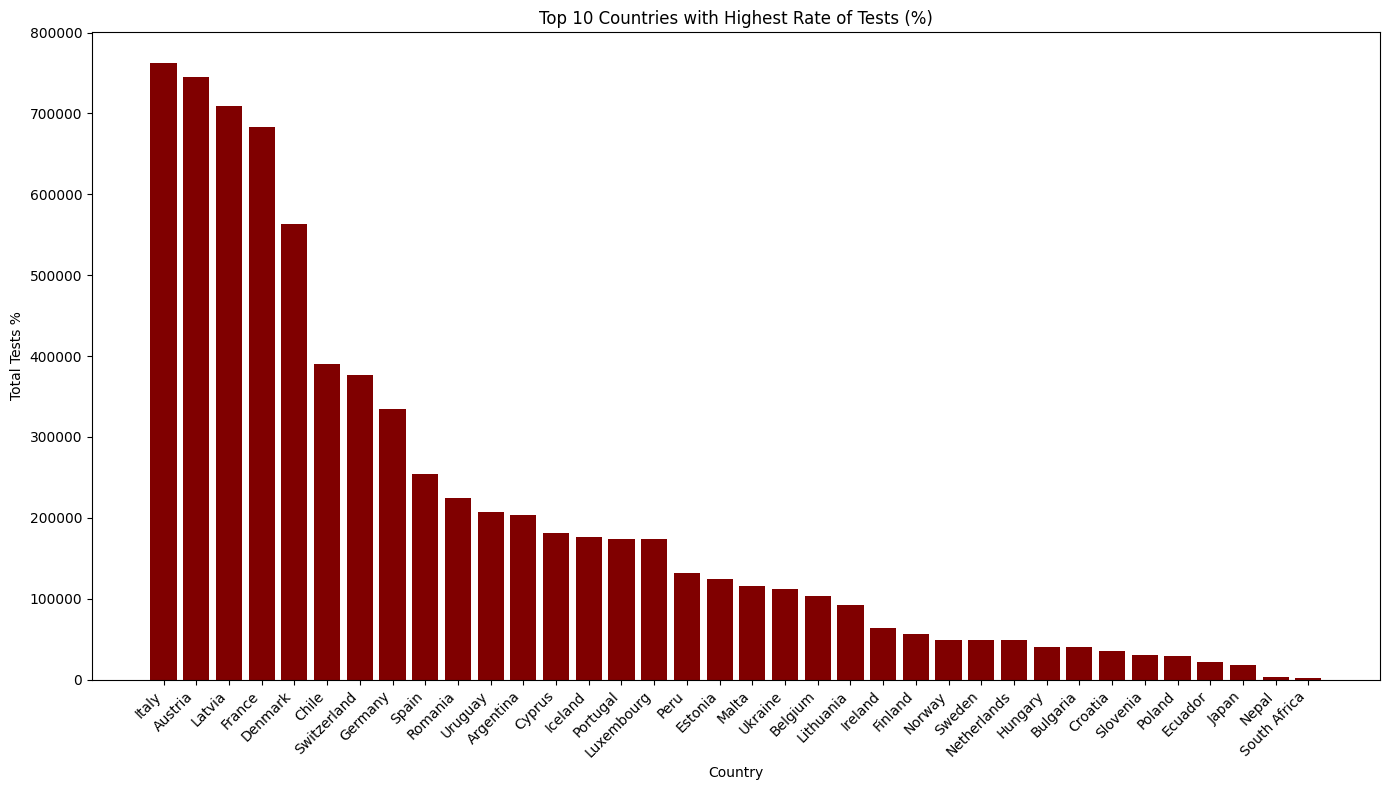

In [13]:
group_data_sorted = group_data.sort_values(by='Total Tests %', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Total Tests %'], color='maroon')
plt.xlabel('Country')
plt.ylabel('Total Tests %')
plt.title('Top 10 Countries with Highest Rate of Tests (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot with additional options
plt.savefig('Total tests.png', dpi=300, bbox_inches='tight')

# Show and save the plot
plt.show()

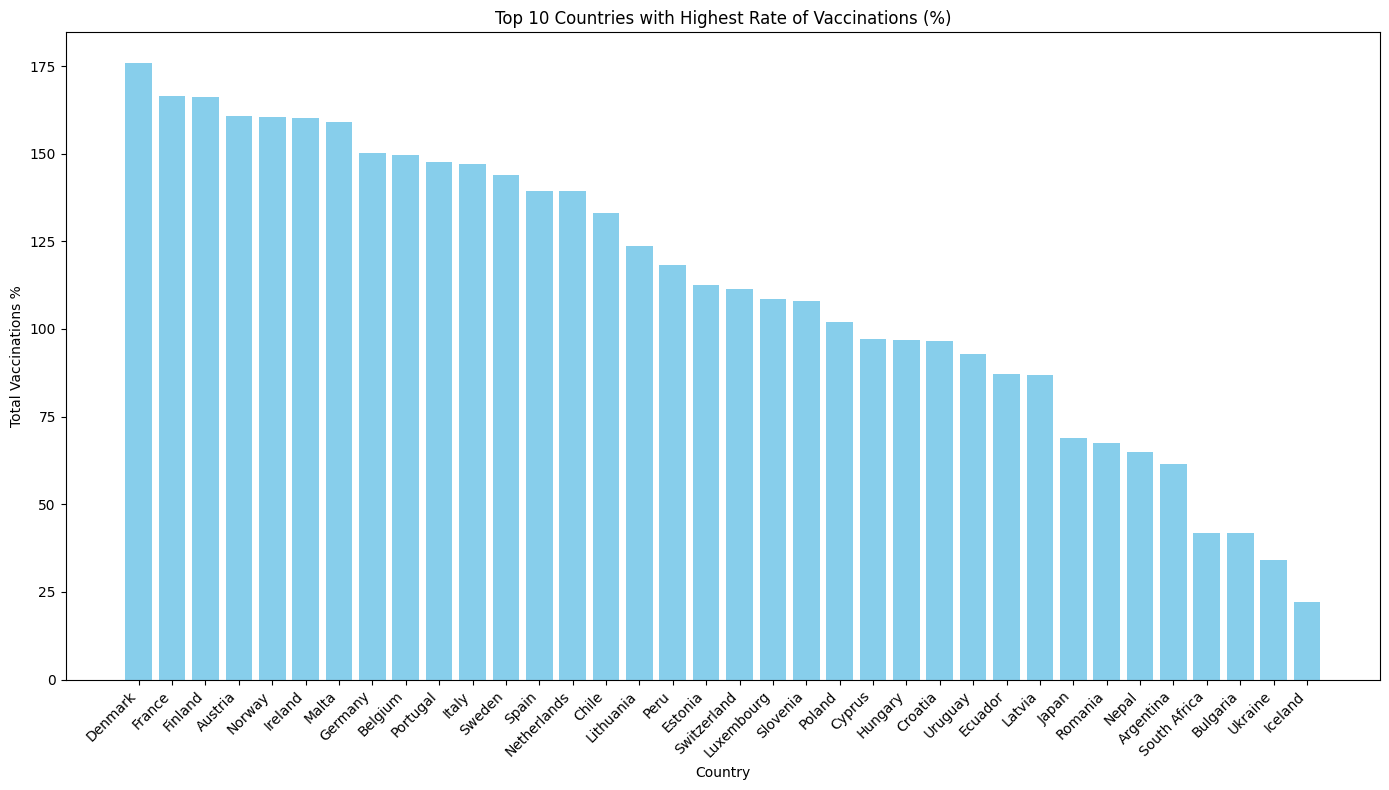

In [14]:
group_data_sorted = group_data.sort_values(by='Total Vaccinations %', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Total Vaccinations %'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations %')
plt.title('Top 10 Countries with Highest Rate of Vaccinations (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show and save the plot
plt.savefig('Total Vaccinations.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

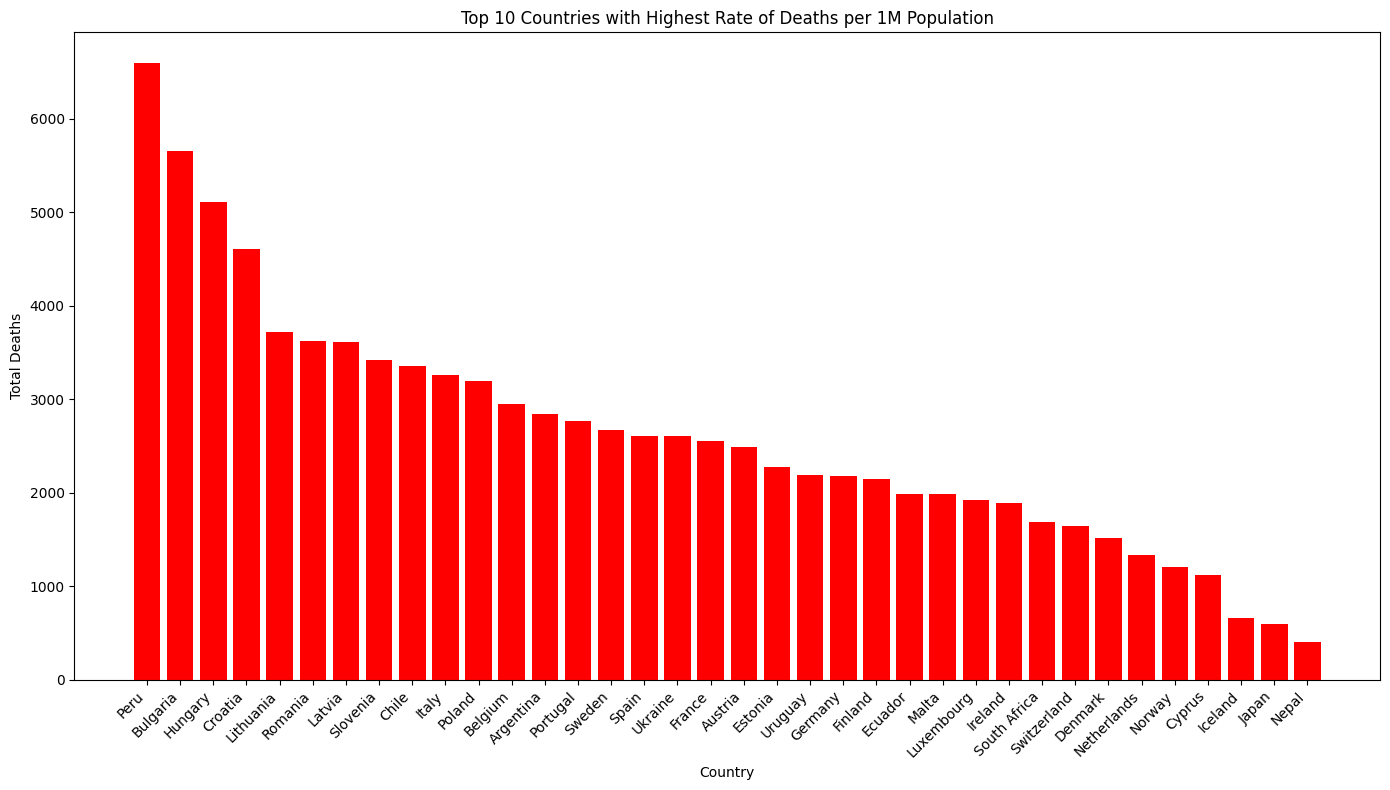

In [15]:
group_data_sorted = group_data.sort_values(by= 'Deaths/1M pop', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
plt.bar(group_data_sorted['Country'], group_data_sorted['Deaths/1M pop'], color='red')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 10 Countries with Highest Rate of Deaths per 1M Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show and save the plot
plt.savefig('Total Deaths.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

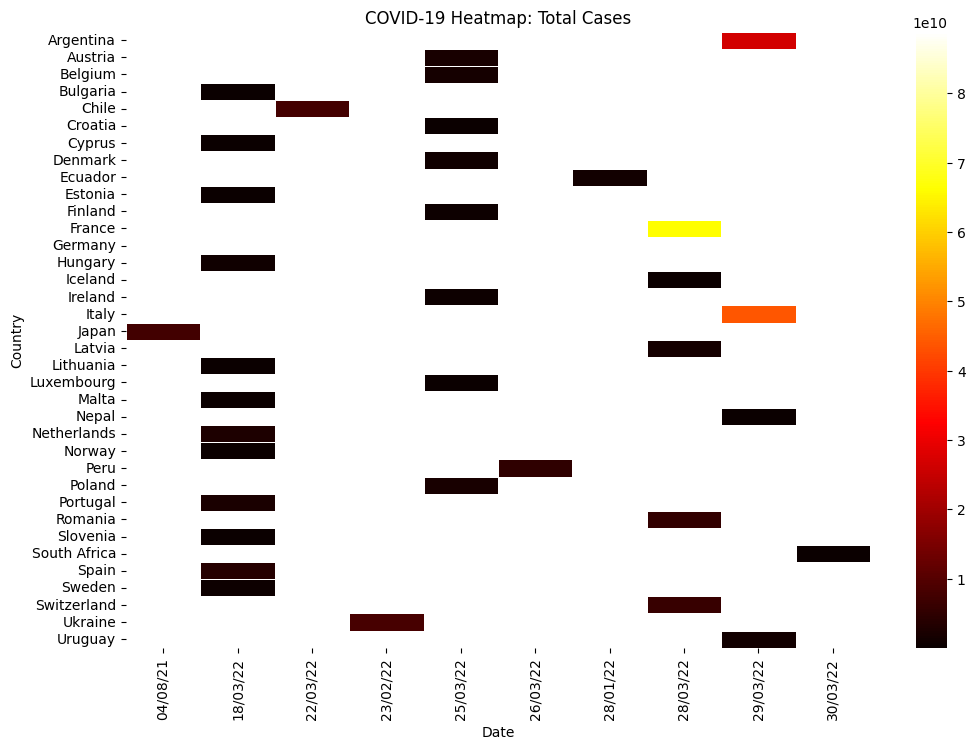

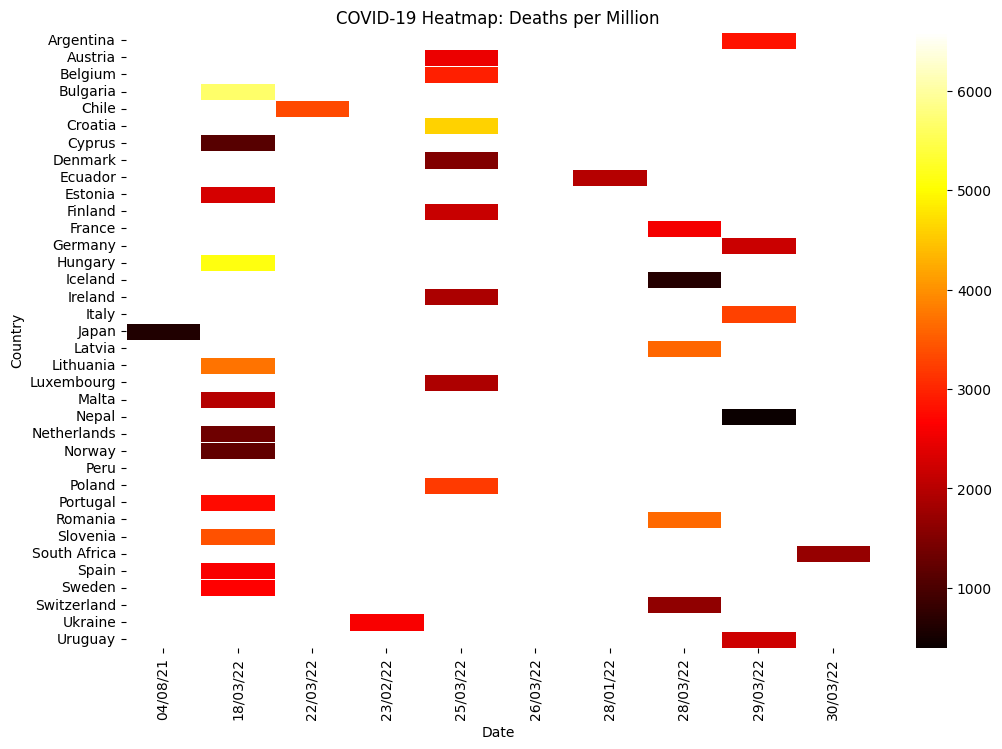

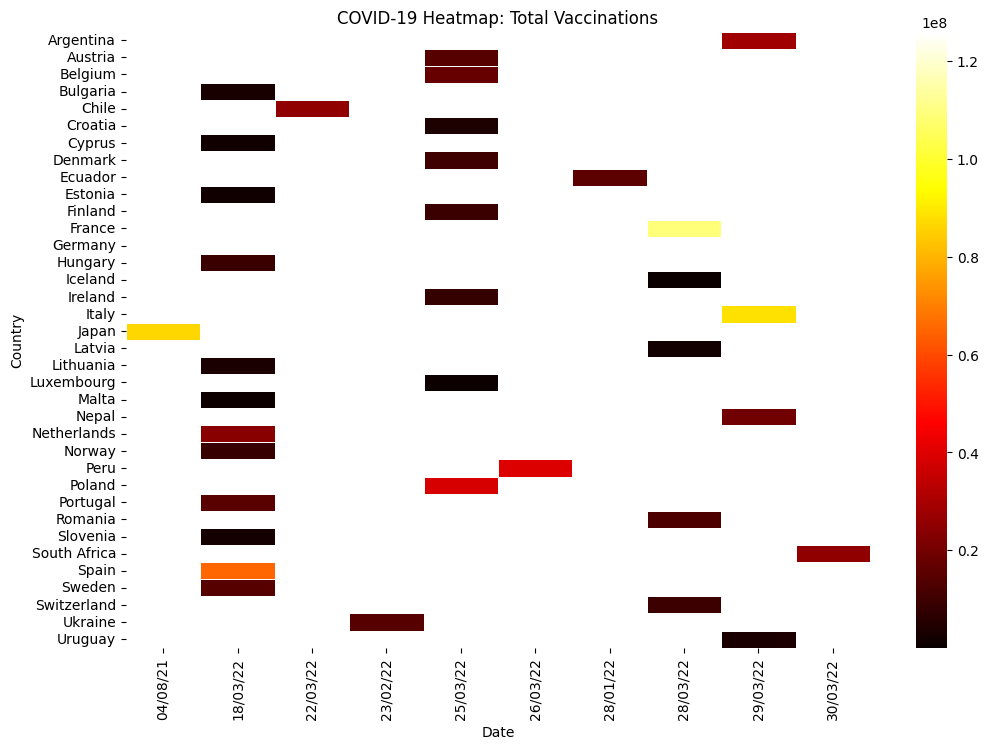

In [19]:
# Convert the 'date' column to datetime
group_data['date'] = pd.to_datetime(group_data['date'])

# Format the date to 'dd/mm/yy'
group_data['formatted_date'] = group_data['date'].dt.strftime('%d/%m/%y')

# Pivot the data to restructure it for the heatmap
heatmap_data_cases = group_data.pivot(index='Country', columns='formatted_date', values='Total Cases')
heatmap_data_deaths = group_data.pivot(index='Country', columns='formatted_date', values='Deaths/1M pop')
heatmap_data_vaccinations = group_data.pivot(index='Country', columns='formatted_date', values='total_vaccinations')

# Plot the heatmap for Total Cases
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_cases, cmap='hot', annot=False, fmt=".1f", linewidths=.5)
plt.xlabel('Date')
plt.ylabel('Country')
plt.title('COVID-19 Heatmap: Total Cases')
plt.xticks(rotation=90)
plt.savefig('Total_Cases_heatmap.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

# Plot the heatmap for Deaths per Million
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_deaths, cmap='hot', annot=False, fmt=".1f", linewidths=.5)
plt.xlabel('Date')
plt.ylabel('Country')
plt.title('COVID-19 Heatmap: Deaths per Million')
plt.xticks(rotation=90)
plt.savefig('Total_Deaths_heatmap.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

# Plot the heatmap for Total Vaccinations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_vaccinations, cmap='hot', annot=False, fmt=".1f", linewidths=.5)
plt.xlabel('Date')
plt.ylabel('Country')
plt.title('COVID-19 Heatmap: Total Vaccinations')
plt.xticks(rotation=90)
plt.savefig('Total_Vaccinations_heatmap.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

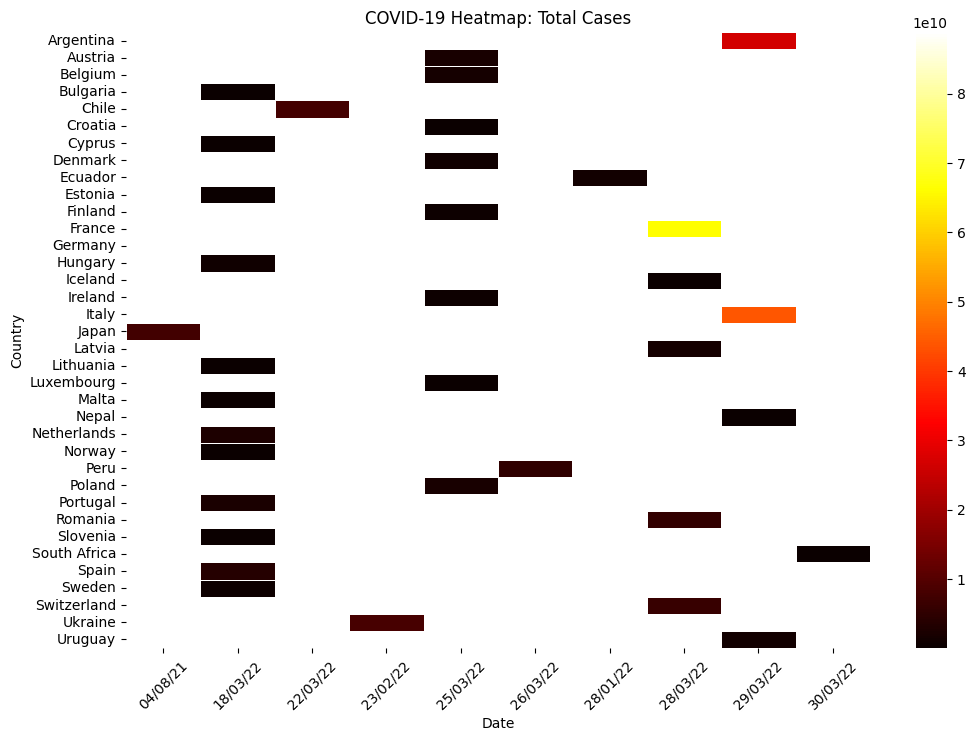

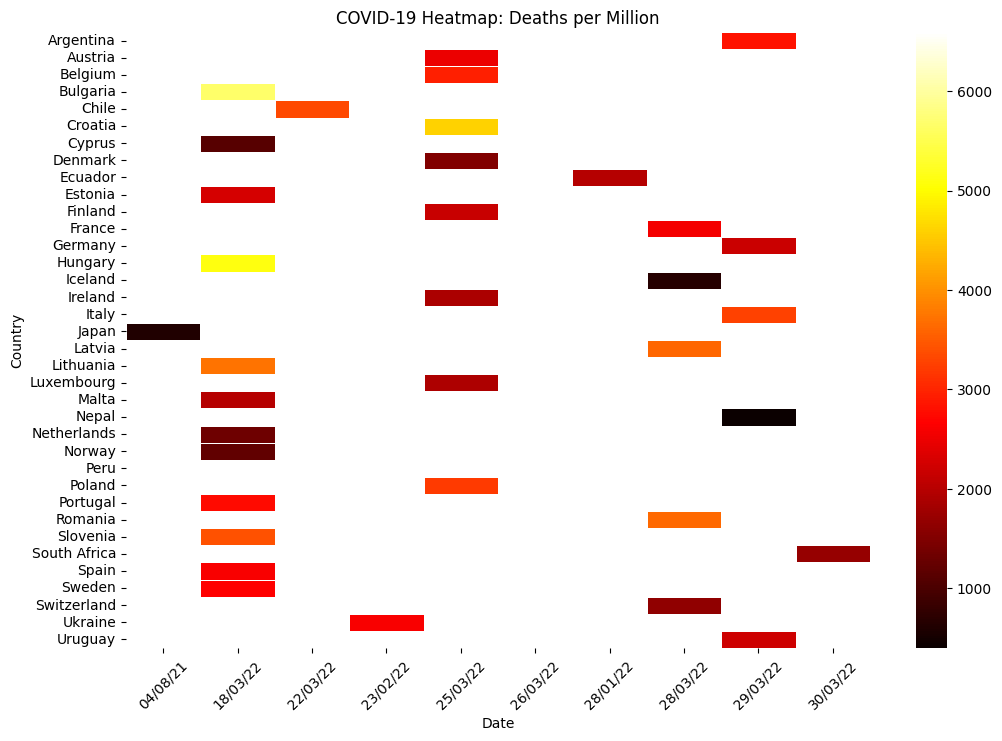

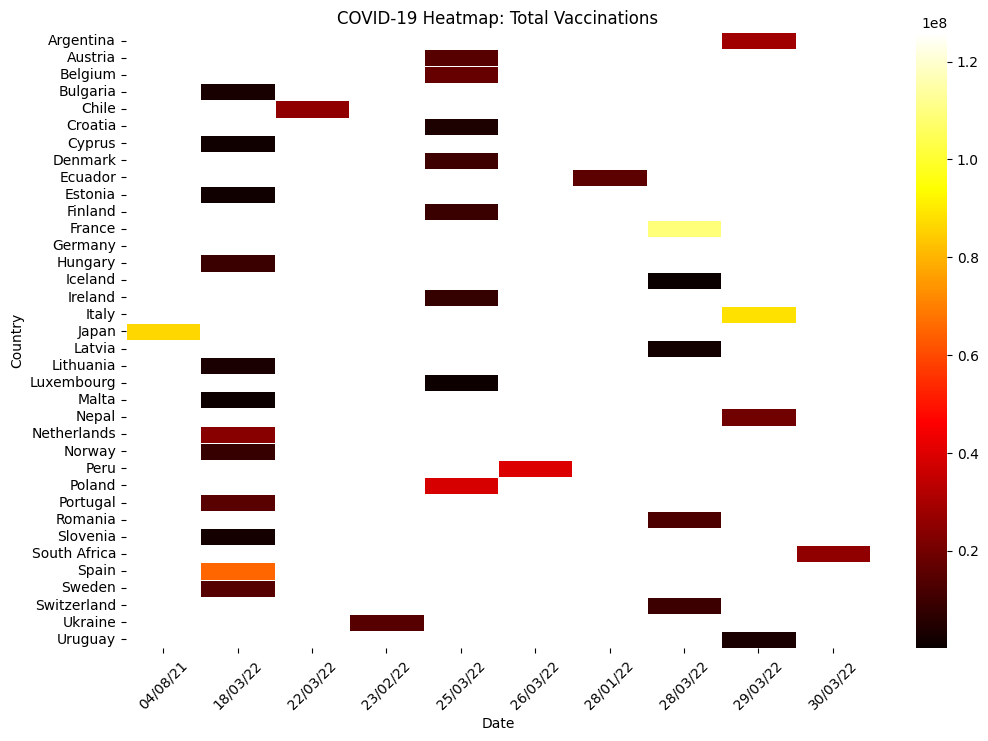

In [20]:
# Convert the 'date' column to datetime
group_data['date'] = pd.to_datetime(group_data['date'])

# Format the date to 'dd/mm/yy'
group_data['formatted_date'] = group_data['date'].dt.strftime('%d/%m/%y')

# Pivot the data to restructure it for the heatmap
heatmap_data_cases = group_data.pivot(index='Country', columns='formatted_date', values='Total Cases')
heatmap_data_deaths = group_data.pivot(index='Country', columns='formatted_date', values='Deaths/1M pop')
heatmap_data_vaccinations = group_data.pivot(index='Country', columns='formatted_date', values='total_vaccinations')

# Function to plot heatmap
def plot_heatmap(data, title, file_name):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, cmap='hot', annot=False, fmt=".1f", linewidths=.5)
    plt.xlabel('Date')
    plt.ylabel('Country')
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.savefig(file_name, dpi=300)  # Save with 300 DPI resolution
    plt.show()

# Plot the heatmap for Total Cases
plot_heatmap(heatmap_data_cases, 'COVID-19 Heatmap: Total Cases', 'Total_Cases_heatmap.png')

# Plot the heatmap for Deaths per Million
plot_heatmap(heatmap_data_deaths, 'COVID-19 Heatmap: Deaths per Million', 'Total_Deaths_heatmap.png')

# Plot the heatmap for Total Vaccinations
plot_heatmap(heatmap_data_vaccinations, 'COVID-19 Heatmap: Total Vaccinations', 'Total_Vaccinations_heatmap.png')

These heatmaps visualize the progression of COVID-19 metrics (total cases, deaths per million, and total vaccinations) over time across different countries.

Total Cases Heatmap: Each cell represents the total number of COVID-19 cases in a specific country on a particular date. The color intensity indicates the magnitude of cases, with darker shades representing higher case numbers. By observing changes in color over time and across countries, trends in the spread of the virus can be identified.

Deaths per Million Heatmap: Similar to the total cases heatmap, each cell represents the number of deaths per million people in a specific country on a particular date. Darker shades indicate higher mortality rates. This heatmap helps visualize the severity of the pandemic's impact on different countries and how it evolves over time.

Total Vaccinations Heatmap: This heatmap shows the progress of COVID-19 vaccination efforts across countries and over time. Each cell represents the total number of vaccinations administered in a specific country on a particular date. Darker shades imply higher vaccination rates. This visualization allows for the tracking of vaccination campaigns and their effectiveness in different regions.

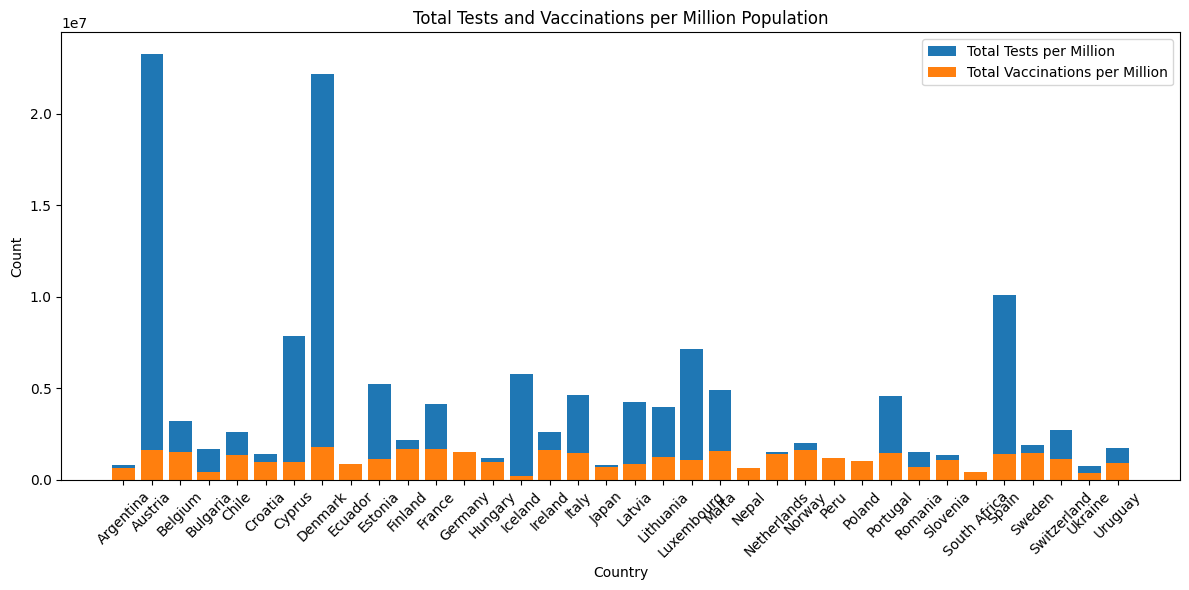

In [19]:
# Bar Graphs
plt.figure(figsize=(12, 6))

# Total tests and total vaccinations per million population across different countries
plt.bar(group_data['Country'], group_data['Tests/1M pop'], label='Total Tests per Million')
plt.bar(group_data['Country'], group_data['total_vaccinations'] / (group_data['Population'] / 1e6), label='Total Vaccinations per Million')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total Tests and Vaccinations per Million Population')
plt.legend()
plt.tight_layout()
plt.savefig('Total tests and vaccinations.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

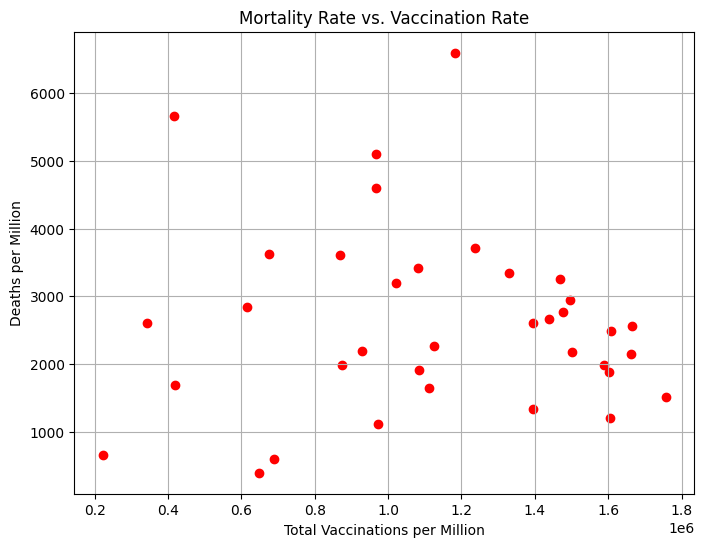

In [20]:
# Scatter Plot
plt.figure(figsize=(8, 6))

# Mortality rate vs. Vaccination rate
plt.scatter(group_data['total_vaccinations'] / (group_data['Population'] / 1e6), group_data['Deaths/1M pop'], c='red')
plt.xlabel('Total Vaccinations per Million')
plt.ylabel('Deaths per Million')
plt.title('Mortality Rate vs. Vaccination Rate')
plt.grid(True)
plt.savefig('Total Mortality.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

Scatterplot intepretation: Negative correlation: If the points tend to form a downward trend, it suggests that higher vaccination rates are associated with lower mortality rates. This would imply that vaccination efforts are effective in reducing deaths from the particular cause being studied.

No correlation: If the points are scattered randomly without any clear pattern, it suggests that there may not be a significant relationship between vaccination rates and mortality rates. Other factors might be influencing mortality rates more strongly.

Positive correlation: If the points form an upward trend, it suggests that higher vaccination rates are associated with higher mortality rates. This would be unexpected and might indicate other factors at play, such as differences in the spread of the disease or variations in healthcare systems.

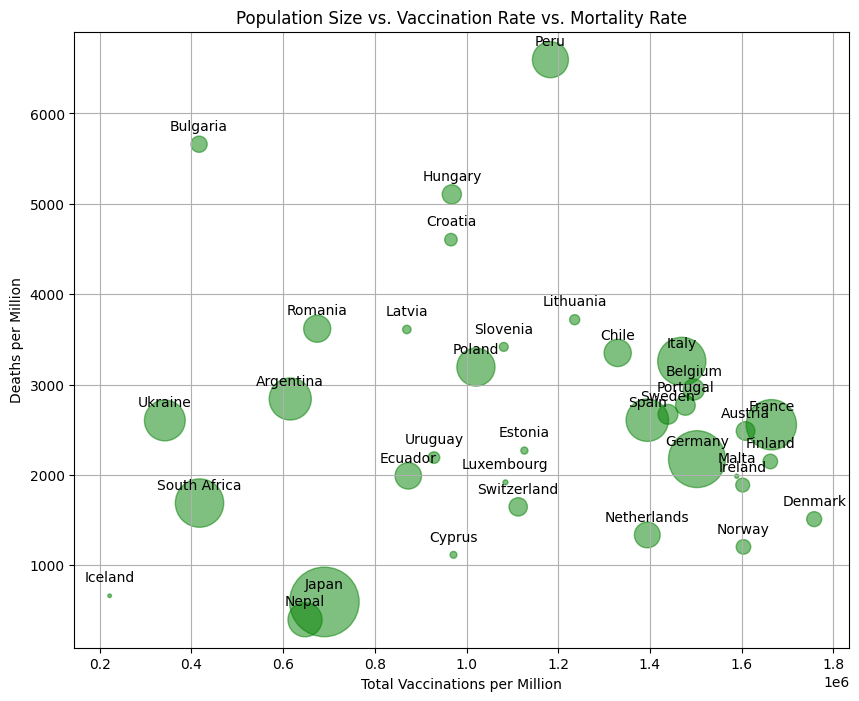

In [21]:
# Bubble Chart
plt.figure(figsize=(10, 8))

# Population size (bubble size), vaccination rate, and mortality rate for each country
bubble_size = group_data['Population'] / 1e6  # Assuming population is in millions
plt.scatter(group_data['total_vaccinations'] / bubble_size, group_data['Deaths/1M pop'], s=bubble_size * 20, alpha=0.5, c='green')

# Adding country labels
for i, txt in enumerate(group_data['Country']):
    plt.annotate(txt, 
                 (group_data['total_vaccinations'].iloc[i] / bubble_size.iloc[i], group_data['Deaths/1M pop'].iloc[i]), 
                 xytext=(0,10), 
                 textcoords='offset points', 
                 ha='center')

plt.xlabel('Total Vaccinations per Million')
plt.ylabel('Deaths per Million')
plt.title('Population Size vs. Vaccination Rate vs. Mortality Rate')
plt.grid(True)
plt.savefig('Total Population Vax Mortality.png', dpi=300)  # Save with 300 DPI resolution
plt.show()

Bubble Map Interpretation: Countries located towards the right side of the chart (higher vaccination rates) tend to have fewer deaths per million people, indicating a potential correlation between higher vaccination rates and lower mortality rates.
The size of the bubbles indicates the population size of each country. Larger bubbles may represent countries with higher absolute numbers of deaths and vaccinations, but the rate of vaccination and mortality is still represented by the position of the bubble along the x and y axes.